# KNeighbors Classifier
First, we tested the `weights` parameter, the optimal one was `distance`. Finally, we selected multiple values for each parameter and trained the model using all combinations to identify the best result.

## Results
The KNeighbors Classifier model achieved a solid maximum accuracy of `0.841`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
# load data
data = pd.read_csv("../data/train_data.csv")
data_labels = pd.read_csv("../data/train_data_labels.csv")
test = pd.read_csv("../data/train_test.csv")
test_labels = pd.read_csv("../data/train_test_labels.csv")

print("Data shape:", data.shape)
print("Data labels shape:", data_labels.shape)
print("Test shape:", test.shape)
print("Test labels shape:", test_labels.shape)

Data shape: (784, 3)
Data labels shape: (784, 1)
Test shape: (107, 3)
Test labels shape: (107, 1)


In [3]:
# convert data to 1D arrays
data_labels = data_labels.values.ravel()
test_labels = test_labels.values.ravel()

In [4]:
# test the weight parameter
results_weight_off = []
results_weight_on = []

for i in range (1, 50):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf2 = KNeighborsClassifier(n_neighbors=i, weights='distance')

    clf.fit(data, data_labels)
    test_predictions = clf.predict(test)
    acc = accuracy_score(test_labels, test_predictions)
    results_weight_off.append(acc)

    clf2.fit(data, data_labels)
    test_predictions2 = clf2.predict(test)
    acc2 = accuracy_score(test_labels, test_predictions2)
    results_weight_on.append(acc2)


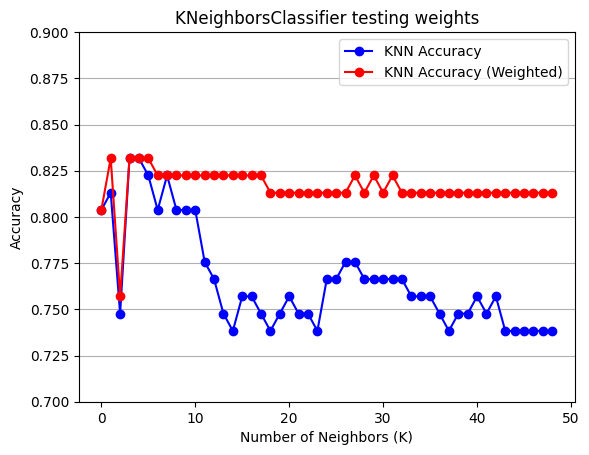

In [5]:
plt.figure()
plt.plot(results_weight_off, marker='o', linestyle='-', color='b', label='KNN Accuracy')
plt.plot(results_weight_on, marker='o', linestyle='-', color='r', label='KNN Accuracy (Weighted)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNeighborsClassifier testing weights')
plt.legend()
plt.grid(axis='y')
plt.ylim(0.7, 0.9)
plt.savefig("../results/KNeighbors_Accuracy_vs_K.png")
plt.show()

In [6]:
# test every combination of parameters
n_neighbors_range = range(1, 10)
leaf_size_range = [20, 30, 40, 50, 60, 70]
p_range = [1, 2, 10, 100]
n_jobs_range = [-2, 1, 2, 5, 20]

results = []
maximum = 0.0

for n_neighbors in n_neighbors_range:
    maximum = 0.0
    for leaf_size in leaf_size_range:
        for p in p_range:
            for n_jobs in n_jobs_range:
                clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance', leaf_size=leaf_size, p=p, n_jobs=n_jobs)
                clf.fit(data, data_labels)
                test_predictions = clf.predict(test)
                acc = accuracy_score(test_labels, test_predictions)
                maximum = max(maximum, float(acc))
    results.append(maximum)
    print(f"Maximum for {n_neighbors} neighbors: {maximum:.3f}")


Maximum for 1 neighbors: 0.822
Maximum for 2 neighbors: 0.841
Maximum for 3 neighbors: 0.757
Maximum for 4 neighbors: 0.832
Maximum for 5 neighbors: 0.841
Maximum for 6 neighbors: 0.832
Maximum for 7 neighbors: 0.822
Maximum for 8 neighbors: 0.822
Maximum for 9 neighbors: 0.822
